In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

LOADING DATASET

In [2]:
df = pd.read_csv('/content/CustomerChurnFinal.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,NaN,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,NaN
3,4.0,35.0,Male,9.0,12.0,NaN,NaN,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


In [3]:
df.shape

(64374, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         61297 non-null  float64
 1   Age                61309 non-null  float64
 2   Gender             61271 non-null  object 
 3   Tenure             61127 non-null  float64
 4   Usage Frequency    61277 non-null  float64
 5   Support Calls      61223 non-null  float64
 6   Payment Delay      61183 non-null  float64
 7   Subscription Type  61230 non-null  object 
 8   Contract Length    61197 non-null  object 
 9   Total Spend        61181 non-null  float64
 10  Last Interaction   61325 non-null  float64
 11  Churn              61219 non-null  float64
dtypes: float64(9), object(3)
memory usage: 5.9+ MB


In [5]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,61297.000000,61309.000000,61127.000000,61277.000000,61223.000000,61183.000000,61181.000000,61325.000000,61219.000000
mean,32189.879097,43.128252,33.561110,15.950699,5.666531,17.954922,565.607394,15.502112,0.474052
std,18577.900089,21.213640,25.521946,13.634061,4.511246,13.216357,396.101920,8.642943,0.499330
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,16102.000000,30.000000,17.000000,7.000000,3.000000,10.000000,309.000000,8.000000,0.000000
50%,32216.000000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,16.000000,0.000000
75%,48265.000000,54.000000,47.000000,23.000000,8.000000,25.000000,773.000000,23.000000,1.000000
max,64374.000000,198.000000,221.000000,119.000000,38.000000,115.000000,3505.000000,30.000000,1.000000


DATA CLEANING

MISSING VALUES TREAATMENT

In [6]:
df_new = df.dropna(subset = ['Churn'])

In [7]:
df_new.isnull().sum()

,0
CustomerID,2932
Age,2912
Gender,2964
Tenure,3084
Usage Frequency,2963
Support Calls,2997
Payment Delay,3033
Subscription Type,2978
Contract Length,3012
Total Spend,3007


In [8]:
numeric_cols = df_new.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_new.select_dtypes(include=['object']).columns

In [9]:
# Impute missing numerical values with the median
for col in numeric_cols:
    df_new[col].fillna(df_new[col].median(), inplace=True)

# Impute missing categorical values with the mode (most frequent value)
for col in categorical_cols:
    df_new[col].fillna(df_new[col].mode()[0], inplace=True)

In [10]:
# Check if any missing values remain
print("\nMissing values after cleaning:")
print(df_new.isnull().sum())


Missing values after cleaning:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


OUTLIERS TREATMENT

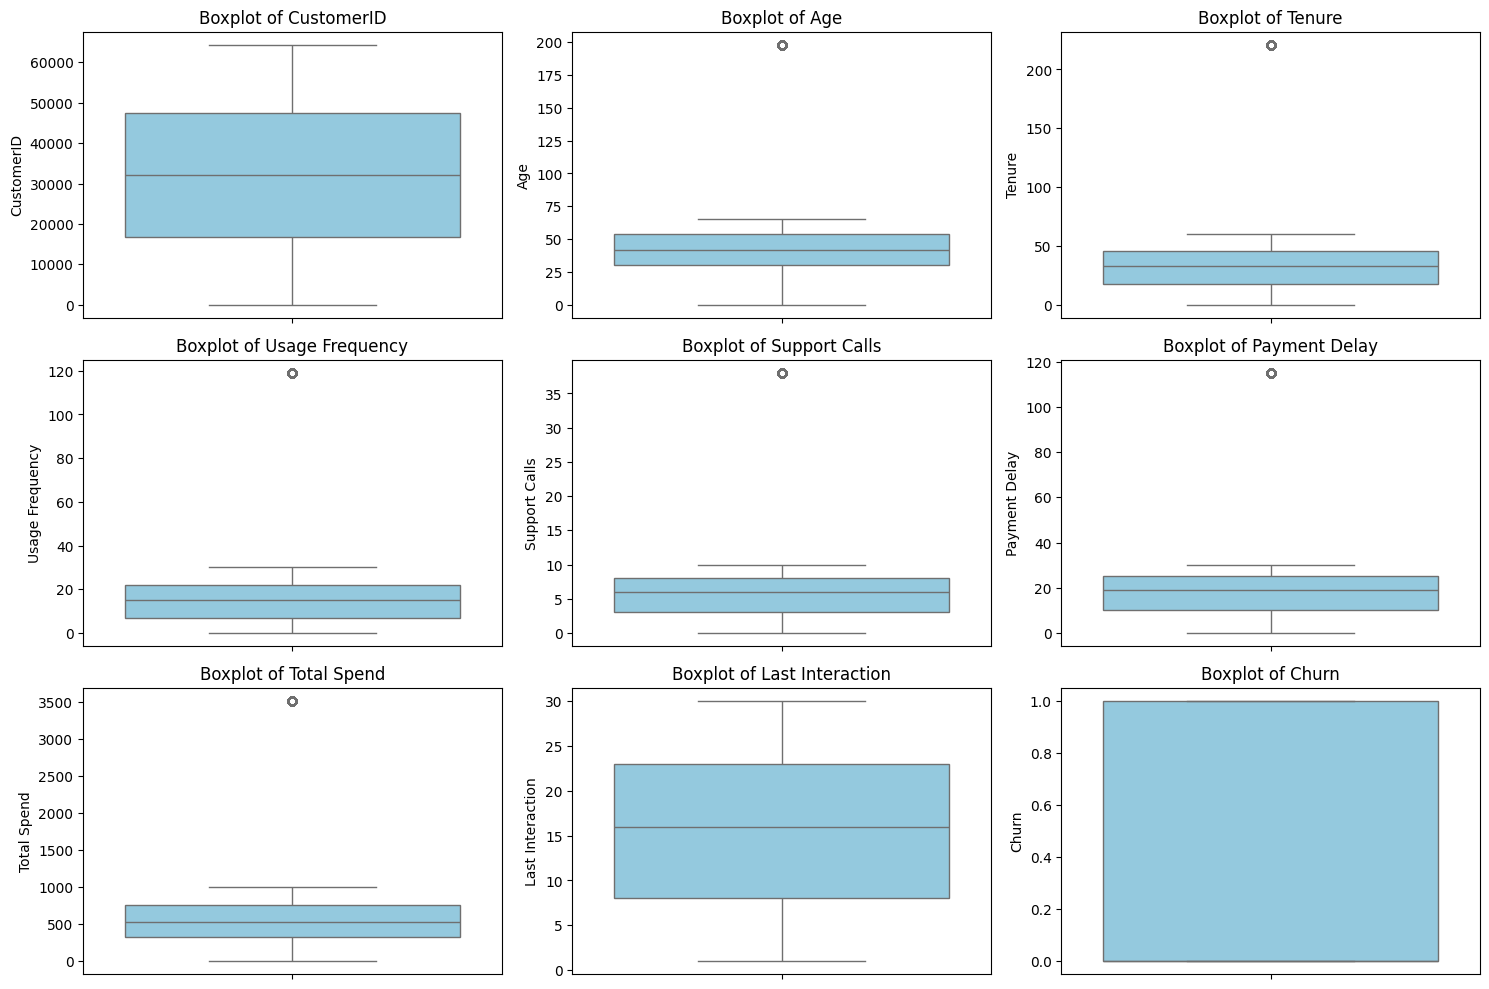

In [11]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_new[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [12]:
# Calculate IQR and identify outliers
outlier_report = []

for col in numeric_cols:
    Q1 = df_new[col].quantile(0.25)
    Q3 = df_new[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df_new[(df_new[col] < lower_bound) | (df_new[col] > upper_bound)]
    count = outliers.shape[0]
    percentage = (count / df_new.shape[0]) * 100

    outlier_report.append({
        'Column': col,
        'Outlier Count': count,
        'Percentage (%)': round(percentage, 2),
    })

# Display the report
outlier_df = pd.DataFrame(outlier_report)
print(outlier_df)

             Column  Outlier Count  Percentage (%)
0        CustomerID              0            0.00
1               Age            581            0.95
2            Tenure            577            0.94
3   Usage Frequency            582            0.95
4     Support Calls            588            0.96
5     Payment Delay            589            0.96
6       Total Spend            583            0.95
7  Last Interaction              0            0.00
8             Churn              0            0.00


In [17]:
print("Applying Outlier Capping...")

for col in numeric_cols:
    # Calculate bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    # If value > upper_bound, replace with upper_bound
    # If value < lower_bound, replace with lower_bound
    df_new[col] = df_new[col].clip(lower=lower_bound, upper=upper_bound)

print("Treatment Complete.")

# Check the new maximums to verify treatment
print("\nMax values after treatment:")
print(df_new[numeric_cols].max())

Applying Outlier Capping...
Treatment Complete.

Max values after treatment:
CustomerID          64374.0
Age                    90.0
Tenure                 92.0
Usage Frequency        47.0
Support Calls          15.5
Payment Delay          47.5
Total Spend          1469.0
Last Interaction       30.0
Churn                   1.0
dtype: float64


EDA

Univariate

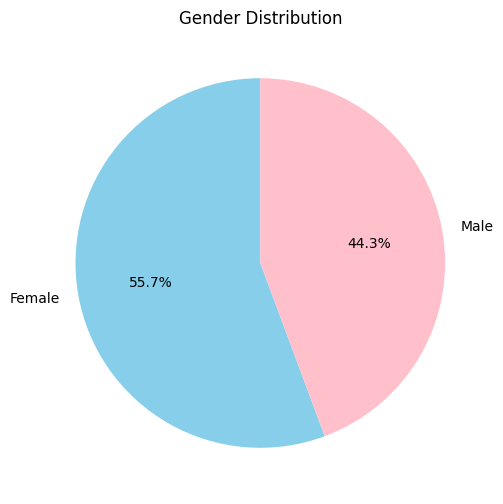

In [35]:
plt.figure(figsize=(6, 6))
df_new['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')  # Hides the 'Gender' label for a cleaner look
plt.show()

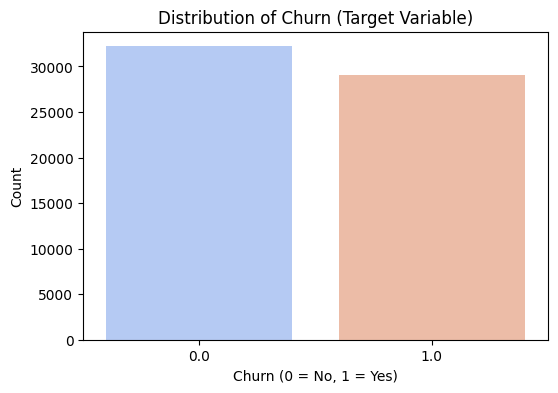

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_new, palette='coolwarm')
plt.title('Distribution of Churn (Target Variable)')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [15]:
#The dataset is fairly balanced between Churn (1) and No Churn (0)

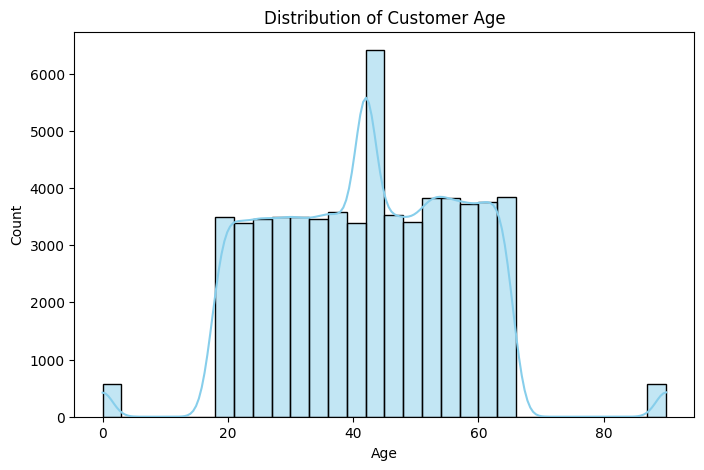

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df_new['Age'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.show()

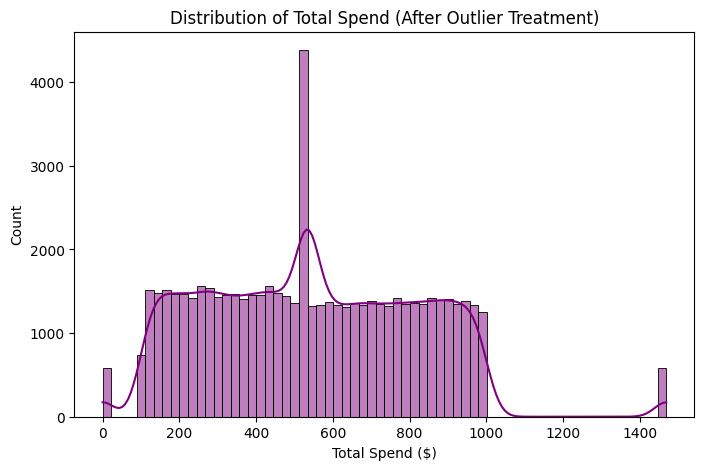

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df_new['Total Spend'], kde=True, color='purple')
plt.title('Distribution of Total Spend (After Outlier Treatment)')
plt.xlabel('Total Spend ($)')
plt.show()

In [21]:
# Unlike the raw data which had values up to 3500, the treated data is capped around ~1422. The distribution is right-skewed,
# meaning most customers spend a small amount (<$800), with a tail of high-value customers capped at the upper limit.

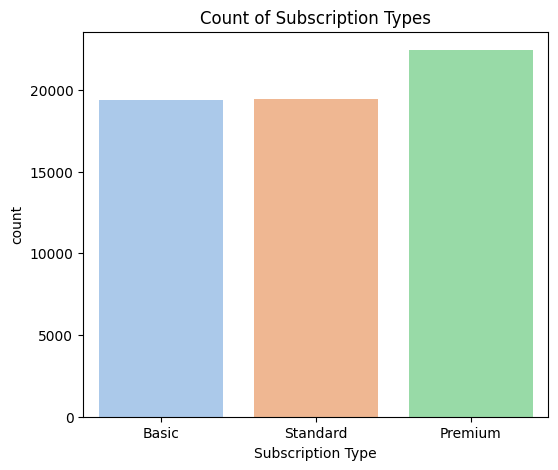

In [38]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Subscription Type', data=df_new, palette='pastel')
plt.title('Count of Subscription Types')
plt.show()

In [23]:
# premium subscription type purchased by many customers compared to basic and standard

Bivariate

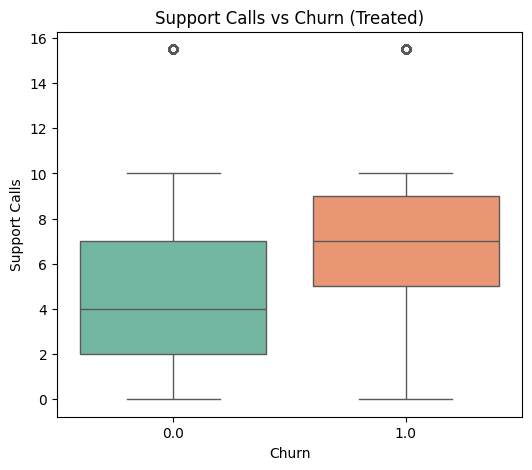

In [25]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Churn', y='Support Calls', data=df_new, palette='Set2')
plt.title('Support Calls vs Churn (Treated)')
plt.show()

In [26]:
# Churned customers (1) have a higher median number of support calls than non-churners.

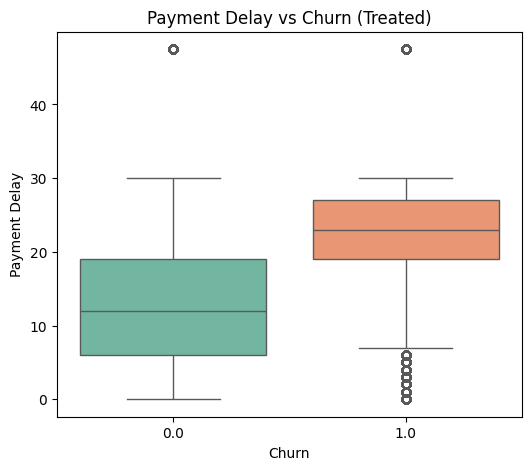

In [27]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Churn', y='Payment Delay', data=df_new, palette='Set2')
plt.title('Payment Delay vs Churn (Treated)')
plt.show()

In [28]:
# Churned customers likely have higher payment delays.

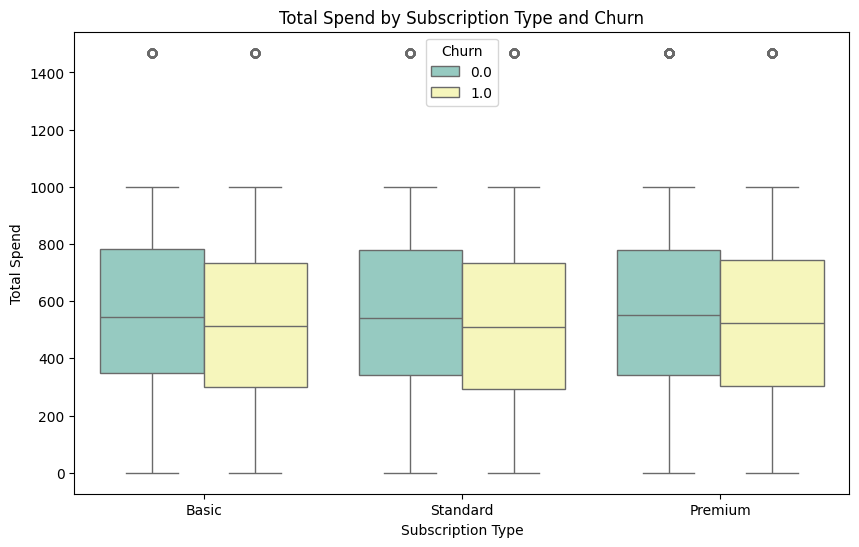

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subscription Type', y='Total Spend', hue='Churn', data=df_new, palette='Set3')
plt.title('Total Spend by Subscription Type and Churn')
plt.show()

In [ ]:
# "Premium" churners (orange box) actually spend less than Premium non-churners (green box),
#  indicating they weren't utilizing the full value of the plan.

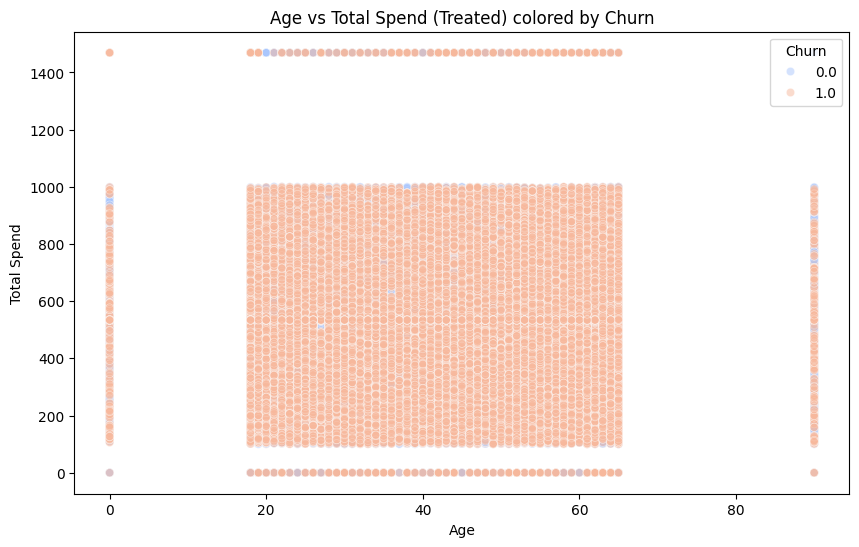

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Spend', hue='Churn', data=df_new, alpha=0.5, palette='coolwarm')
plt.title('Age vs Total Spend (Treated) colored by Churn')
plt.show()

In [31]:
# clusters where "Younger, Low Spenders" are churning (red dots),
# or perhaps a specific segment of "High Spending Seniors" is retaining (blue dots).

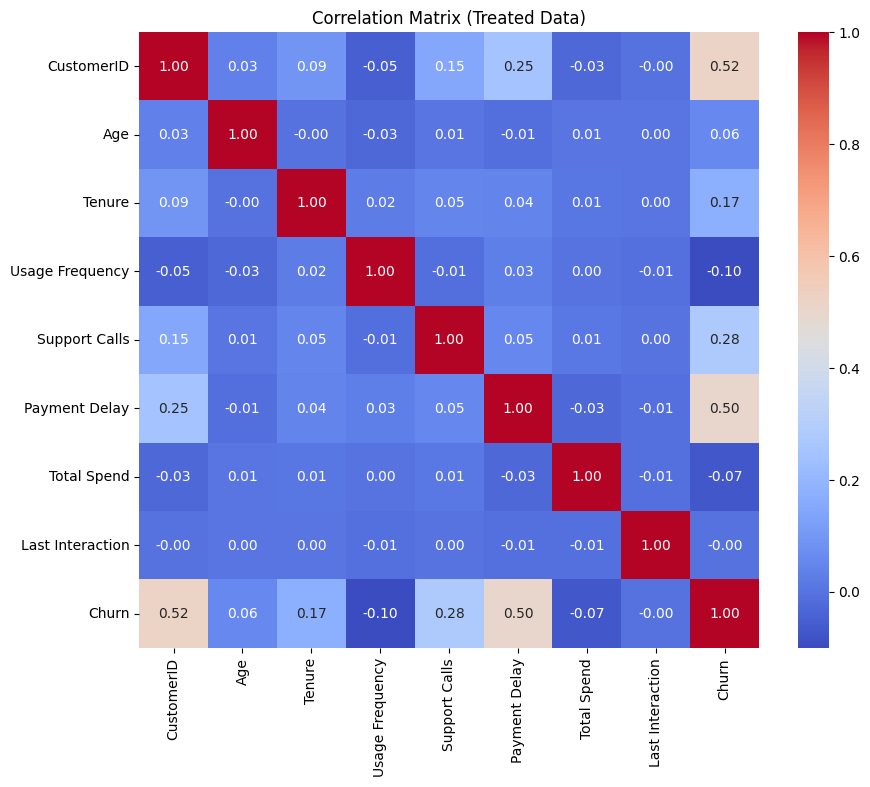

In [32]:
plt.figure(figsize=(10, 8))
# Select numeric columns
numeric_treated = df_new.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_treated.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Treated Data)')
plt.show()

MACHINE LEARNING

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
# 1. Drop irrelevant columns (IDs don't predict churn)
df_model = df_new.drop(columns=['CustomerID'])

In [45]:
# 2. Encoding: Convert text labels (Male, Basic, etc.) into numbers (0/1)
# drop_first=True avoids redundancy (e.g., we don't need both 'Male' and 'Female' columns)
df_encoded = pd.get_dummies(df_model, drop_first=True)

In [47]:
# 3. Define Features (X) and Target (y)
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

In [48]:
# 4. Split Data: 80% for Training, 20% for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# 5. Scaling: Standardize numerical features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
print("Data Preprocessing Complete.")
print(f"Training Data Shape: {X_train_scaled.shape}")
print(f"Testing Data Shape: {X_test_scaled.shape}")

Data Preprocessing Complete.
Training Data Shape: (48975, 12)
Testing Data Shape: (12244, 12)


In [51]:
# Initialize and Train the Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [53]:
y_pred = model.predict(X_test_scaled)

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# 2. Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 80.17%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      6436
         1.0       0.78      0.80      0.79      5808

    accuracy                           0.80     12244
   macro avg       0.80      0.80      0.80     12244
weighted avg       0.80      0.80      0.80     12244



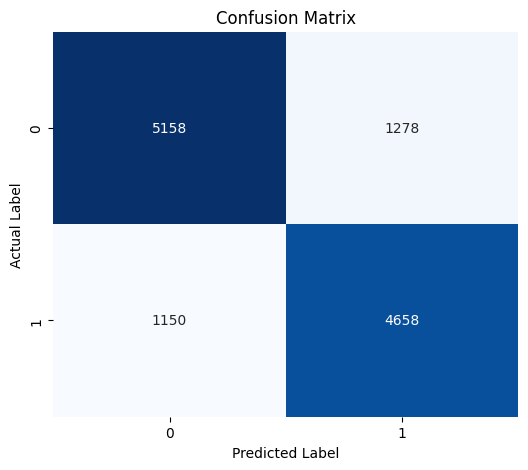

In [54]:
# 3. Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

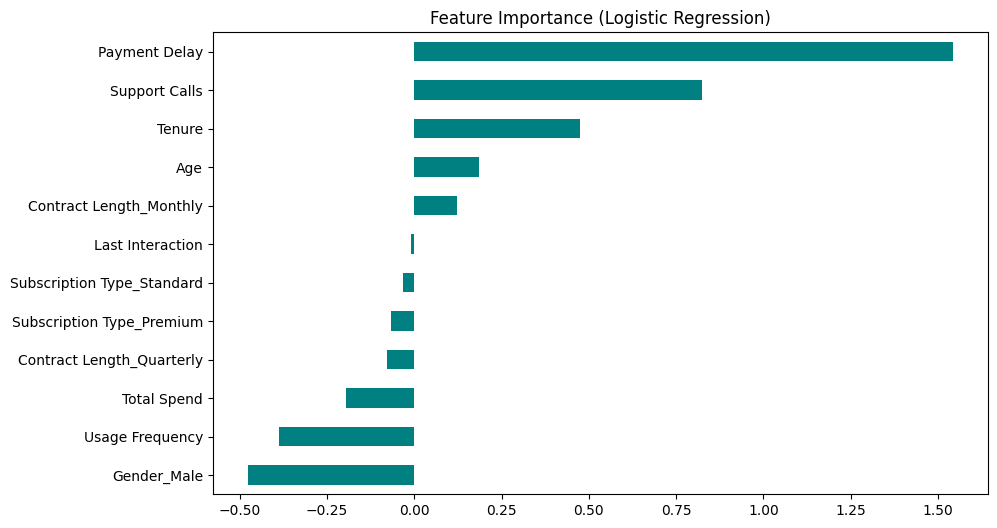

In [55]:
# 4. Feature Importance Plot
# Which features drove the decisions?
plt.figure(figsize=(10, 6))
importance = pd.Series(model.coef_[0], index=X.columns).sort_values()
importance.plot(kind='barh', color='teal')
plt.title('Feature Importance (Logistic Regression)')
plt.show()